In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from termcolor import colored

ModuleNotFoundError: No module named 'termcolor'

In [2]:
df_train = pd.read_csv("./files/train.csv" , sep = "," , encoding = 'utf-8')


C:\Users\Adam\AppData\Local\Temp\ipykernel_37636\953991890.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("./files/train.csv" , sep = "," , encoding = 'utf-8')


Test działania

In [5]:
df_train.shape
df_train.info()


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
# drop duplikatów
df_train.drop_duplicates(subset="ID", inplace=True)

In [7]:
# test pliku 
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [9]:
for i in df_train.columns:
    print(df_train[i].value_counts())
    print('*'*50)

0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
**************************************************
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
**************************************************
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
**************************************************
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64
*

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

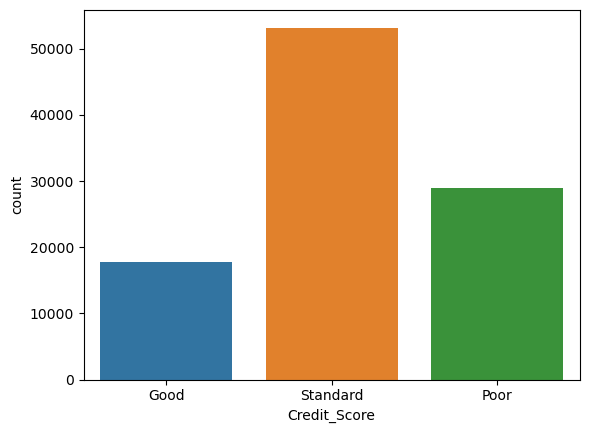

In [10]:
sns.countplot(df_train['Credit_Score'])

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [24]:
FeaturesToConvert = ['Age', 'Annual_Income','Num_of_Loan', 'Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt','Amount_invested_monthly', 'Monthly_Balance']

# Poszukiwanie błędów
def check():
    for feature in FeaturesToConvert:
        uniques = df_train[feature].unique()
        print('Feature:', '\n', feature, '\n', uniques, '\n', '--'*40, '\n')

# Usuwanie błędów
# 1. Usunięcie znaków '-', '_'
# 2. Zamiana pustych wartości na NaN
# 3. Zamiana typów danych na float64
def editData():
    for feature in FeaturesToConvert:
        df_train[feature] = df_train[feature].str.strip('-_')
    for feature in FeaturesToConvert:
        df_train[feature] = df_train[feature].replace({'':np.nan})
    for feature in FeaturesToConvert:
        df_train[feature] = df_train[feature].astype('float64')
    
#editData()

# uzupełnij braki średnią

df_train['Monthly_Inhand_Salary'] = df_train['Monthly_Inhand_Salary'].fillna(method='pad')

# puste na 0 Changed_Credit_Limit,  Num_of_Delayed_Payment 
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].fillna(0)
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].fillna(0)
check()

Feature: 
 Age 
 [  23.  500.   28. ... 4808. 2263. 1342.] 
 -------------------------------------------------------------------------------- 

Feature: 
 Annual_Income 
 [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99] 
 -------------------------------------------------------------------------------- 

Feature: 
 Num_of_Loan 
 [4.000e+00 1.000e+00 3.000e+00 9.670e+02 1.000e+02 0.000e+00 2.000e+00
 7.000e+00 5.000e+00 6.000e+00 8.000e+00 9.000e+00 1.464e+03 6.220e+02
 3.520e+02 4.720e+02 1.017e+03 9.450e+02 1.460e+02 5.630e+02 3.410e+02
 4.440e+02 7.200e+02 1.485e+03 4.900e+01 7.370e+02 1.106e+03 4.660e+02
 7.280e+02 3.130e+02 8.430e+02 5.970e+02 6.170e+02 1.190e+02 6.630e+02
 6.400e+02 9.200e+01 1.019e+03 5.010e+02 1.302e+03 3.900e+01 7.160e+02
 8.480e+02 9.310e+02 1.214e+03 1.860e+02 4.240e+02 1.001e+03 1.110e+03
 1.152e+03 4.570e+02 1.433e+03 1.187e+03 5.200e+01 1.480e+03 1.047e+03
 1.035e+03 1.347e+03 3.300e+01 1.930e+02 6.990e+02 3.290e+02 1.451e+03
 4.840e+02 1.3

Kodowanie zmiennych kategorycznych

In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
# Tworzenie obiektu enkodera
le = LabelEncoder()

df_train.Occupation = le.fit_transform(df_train.Occupation)


In [30]:
# Zamiana miesięcy na wart. liczbowe
d = {
    'January':1, 
    'February':2, 
    'March':3, 
    'April':4, 
    'May':5, 
    'June':6, 
    'July':7, 
    'August':8, 
    'September':9, 
    'October':10, 
    'November':11, 
    'December':12 
    }
df_train.Month = df_train.Month.map(d)


       ID Customer_ID  Month           Name    Age          SSN  Occupation  \
0  0x1602   CUS_0xd40      1  Aaron Maashoh   23.0  821-00-0265          12   
1  0x1603   CUS_0xd40      2  Aaron Maashoh   23.0  821-00-0265          12   
2  0x1604   CUS_0xd40      3  Aaron Maashoh  500.0  821-00-0265          12   
3  0x1605   CUS_0xd40      4  Aaron Maashoh   23.0  821-00-0265          12   
4  0x1606   CUS_0xd40      5  Aaron Maashoh   23.0  821-00-0265          12   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                  3  ...           _   
1       19114.12            1824.843333                  3  ...        Good   
2       19114.12            1824.843333                  3  ...        Good   
3       19114.12            1824.843333                  3  ...        Good   
4       19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio     

In [32]:
# Sprawdzenie poprawności
print(df_train.Month)

# credit history age (dzielenie kolumny)
# do jutra - do zamiany prostych kolumn liczbowych
# do slajdu 41
# Przykład zamiany zmiennych kategorycznych na nazwy w wypadku zamiany kilku kolumn na raz
# Te nazwy są wymyślonymi z innego przykładu
# Zawód już jest enkodowany
# Miesiąc, zawód, typ pożyczki (opisowe )
# Do kredytu history (z wyłączeniem, są błędy w danych)


0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 100000, dtype: int64
